# Covid-19 Visualization

### Import Package

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from datascience import *
import warnings 
warnings.filterwarnings("ignore")

### Import Dataset

In [2]:
confirmed = pd.read_csv('time_series_covid19_confirmed_global_narrow.csv', skiprows = [1], dtype = {'Value': int}) #remove the 2nd row

confirmed['Status'] = 'Confirmed'

confirmed

Province/State Country/Region        Lat       Long        Date  \
0                 NaN    Afghanistan  33.939110  67.709953  2022-02-02   
1                 NaN    Afghanistan  33.939110  67.709953  2022-02-01   
2                 NaN    Afghanistan  33.939110  67.709953  2022-01-31   
3                 NaN    Afghanistan  33.939110  67.709953  2022-01-30   
4                 NaN    Afghanistan  33.939110  67.709953  2022-01-29   
...               ...            ...        ...        ...         ...   
208035            NaN       Zimbabwe -19.015438  29.154857  2020-01-26   
208036            NaN       Zimbabwe -19.015438  29.154857  2020-01-25   
208037            NaN       Zimbabwe -19.015438  29.154857  2020-01-24   
208038            NaN       Zimbabwe -19.015438  29.154857  2020-01-23   
208039            NaN       Zimbabwe -19.015438  29.154857  2020-01-22   

         Value ISO 3166-1 Alpha 3-Codes  Region Code  Sub-region Code  \
0       164190                      AFG        142.0             34.0   
1       163555                      AFG        142.0             34.0   
2       162926                      AFG        142.0             34.0   
3       162111                      AFG        142.0             34.0   
4       161290                      AFG        142.0             34.0   
...        ...                      ...          ...              ...   
208035       0                      ZWE          2.0            202.0   
208036       0                      ZWE          2.0            202.0   
208037       0                      ZWE          2.0            202.0   
208038       0                      ZWE          2.0            202.0   
208039       0                      ZWE          2.0            202.0   

        Intermediate Region Code     Status  
0                            NaN  Confirmed  
1                            NaN  Confirmed  
2                            NaN  Confirmed  
3                            NaN  Confirmed  
4                            NaN  Confirmed  
...                          ...        ...  
208035                      14.0  Confirmed  
208036                      14.0  Confirmed  
208037                      14.0  Confirmed  
208038                      14.0  Confirmed  
208039                      14.0  Confirmed  

[208040 rows x 11 columns]

In [3]:
death = pd.read_csv('time_series_covid19_deaths_global_narrow.csv', skiprows = [1], dtype = {'Value': int})

death['Status'] = 'Death'

death

Province/State Country/Region        Lat       Long        Date  Value  \
0                 NaN    Afghanistan  33.939110  67.709953  2022-02-02   7418   
1                 NaN    Afghanistan  33.939110  67.709953  2022-02-01   7417   
2                 NaN    Afghanistan  33.939110  67.709953  2022-01-31   7414   
3                 NaN    Afghanistan  33.939110  67.709953  2022-01-30   7408   
4                 NaN    Afghanistan  33.939110  67.709953  2022-01-29   7405   
...               ...            ...        ...        ...         ...    ...   
208035            NaN       Zimbabwe -19.015438  29.154857  2020-01-26      0   
208036            NaN       Zimbabwe -19.015438  29.154857  2020-01-25      0   
208037            NaN       Zimbabwe -19.015438  29.154857  2020-01-24      0   
208038            NaN       Zimbabwe -19.015438  29.154857  2020-01-23      0   
208039            NaN       Zimbabwe -19.015438  29.154857  2020-01-22      0   

       ISO 3166-1 Alpha 3-Codes  Region Code  Sub-region Code  \
0                           AFG        142.0             34.0   
1                           AFG        142.0             34.0   
2                           AFG        142.0             34.0   
3                           AFG        142.0             34.0   
4                           AFG        142.0             34.0   
...                         ...          ...              ...   
208035                      ZWE          2.0            202.0   
208036                      ZWE          2.0            202.0   
208037                      ZWE          2.0            202.0   
208038                      ZWE          2.0            202.0   
208039                      ZWE          2.0            202.0   

        Intermediate Region Code Status  
0                            NaN  Death  
1                            NaN  Death  
2                            NaN  Death  
3                            NaN  Death  
4                            NaN  Death  
...                          ...    ...  
208035                      14.0  Death  
208036                      14.0  Death  
208037                      14.0  Death  
208038                      14.0  Death  
208039                      14.0  Death  

[208040 rows x 11 columns]

### Merge Dataset

In [4]:
total = pd.concat([confirmed, death], ignore_index = True)

total

Province/State Country/Region        Lat       Long        Date  \
0                 NaN    Afghanistan  33.939110  67.709953  2022-02-02   
1                 NaN    Afghanistan  33.939110  67.709953  2022-02-01   
2                 NaN    Afghanistan  33.939110  67.709953  2022-01-31   
3                 NaN    Afghanistan  33.939110  67.709953  2022-01-30   
4                 NaN    Afghanistan  33.939110  67.709953  2022-01-29   
...               ...            ...        ...        ...         ...   
416075            NaN       Zimbabwe -19.015438  29.154857  2020-01-26   
416076            NaN       Zimbabwe -19.015438  29.154857  2020-01-25   
416077            NaN       Zimbabwe -19.015438  29.154857  2020-01-24   
416078            NaN       Zimbabwe -19.015438  29.154857  2020-01-23   
416079            NaN       Zimbabwe -19.015438  29.154857  2020-01-22   

         Value ISO 3166-1 Alpha 3-Codes  Region Code  Sub-region Code  \
0       164190                      AFG        142.0             34.0   
1       163555                      AFG        142.0             34.0   
2       162926                      AFG        142.0             34.0   
3       162111                      AFG        142.0             34.0   
4       161290                      AFG        142.0             34.0   
...        ...                      ...          ...              ...   
416075       0                      ZWE          2.0            202.0   
416076       0                      ZWE          2.0            202.0   
416077       0                      ZWE          2.0            202.0   
416078       0                      ZWE          2.0            202.0   
416079       0                      ZWE          2.0            202.0   

        Intermediate Region Code     Status  
0                            NaN  Confirmed  
1                            NaN  Confirmed  
2                            NaN  Confirmed  
3                            NaN  Confirmed  
4                            NaN  Confirmed  
...                          ...        ...  
416075                      14.0      Death  
416076                      14.0      Death  
416077                      14.0      Death  
416078                      14.0      Death  
416079                      14.0      Death  

[416080 rows x 11 columns]

### Total Covid-19 Cases All Over the World Until 2/2/2022

In [5]:
tot_num = total.query("Date == '2022-02-02'")[["Status", "Value"]].groupby(["Status"], as_index = False).sum()

tot_num

Status      Value
0  Confirmed  384859233
1      Death    5700923

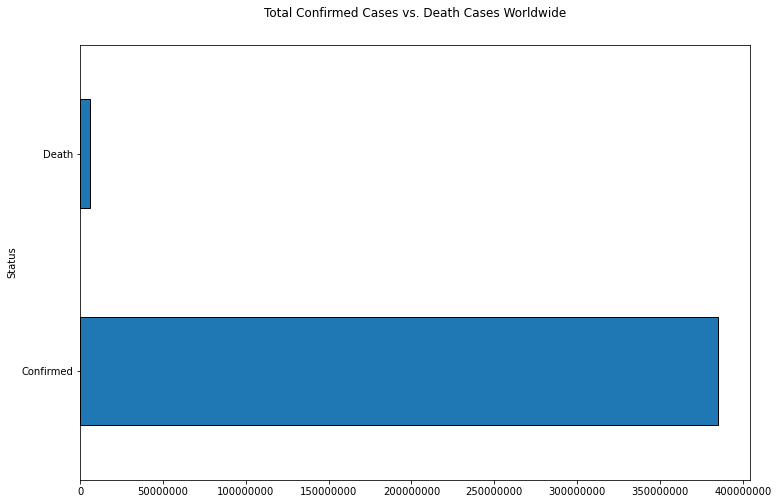

In [13]:
fig, ax = plt.subplots(figsize = (12, 8))  # using this when plt.figure(figsize = (12, 8)) doesn't work
tot_num.plot(kind = "barh", x = "Status", legend = False, ax = ax)
plt.title("Total Confirmed Cases vs. Death Cases Worldwide", y = 1.05, x = 0.5)
plt.xlabel("")
plt.ylabel("Status")
plt.ticklabel_format(axis = "x", style = "plain") # plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.show()


### Total Confirmed & Death Cases for Each Country/Region

In [9]:
df = total.query("Date == '2022-02-02'")[["Date", "Country/Region", "Status", "Value"]].groupby(["Status", "Country/Region"], as_index = False).sum()

df


Status      Country/Region   Value
0    Confirmed         Afghanistan  164190
1    Confirmed             Albania  261240
2    Confirmed             Algeria  254885
3    Confirmed             Andorra   36315
4    Confirmed              Angola   98267
..         ...                 ...     ...
387      Death             Vietnam   37777
388      Death  West Bank and Gaza    5116
389      Death               Yemen    2018
390      Death              Zambia    3921
391      Death            Zimbabwe    5352

[392 rows x 3 columns]

### Top 10 Countries/Regions with Most Confirmed Cases 

In [10]:
con_top = df.query("Status == 'Confirmed'").sort_values(by = ['Value'], ascending = False).head(10)

con_top

Status  Country/Region     Value
182  Confirmed              US  75680487
79   Confirmed           India  41803318
23   Confirmed          Brazil  25820745
62   Confirmed          France  19998301
186  Confirmed  United Kingdom  17632062
144  Confirmed          Russia  11936064
181  Confirmed          Turkey  11833165
85   Confirmed           Italy  11235745
66   Confirmed         Germany  10474992
164  Confirmed           Spain  10125348

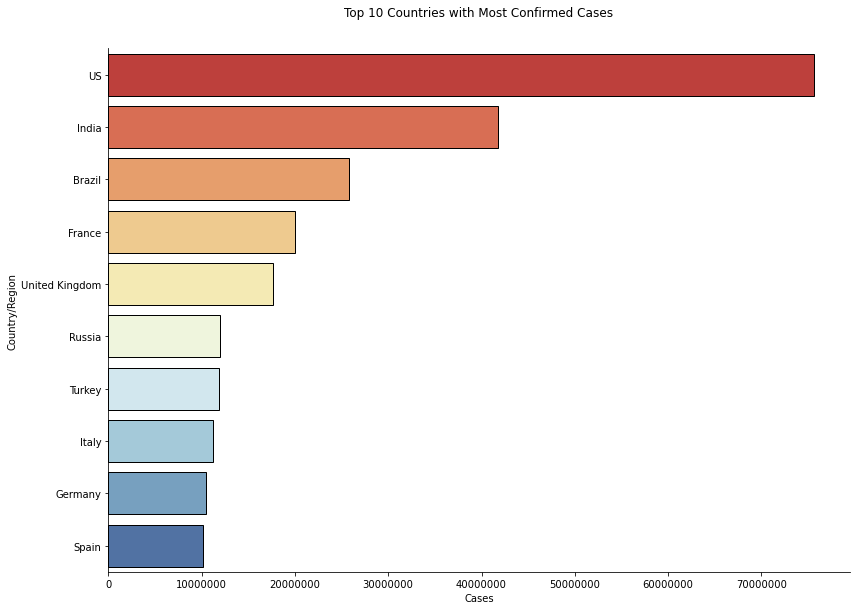

In [14]:
sns.catplot(x = "Value", y = "Country/Region", data = con_top, kind = "bar", height = 8, aspect = 12/8, palette = "RdYlBu")
plt.title("Top 10 Countries with Most Confirmed Cases", y = 1.05, x = 0.5)
plt.xlabel("Cases")
plt.ticklabel_format(axis = "x", style = "plain") 
plt.show()

### Top 10 Countries/Regions with Most Death Cases 

In [15]:
dea_top = df.query("Status == 'Death'").sort_values(by = ['Value'], ascending = False).head(10)

dea_top

Status  Country/Region   Value
378  Death              US  894316
219  Death          Brazil  629301
275  Death           India  498983
340  Death          Russia  325986
311  Death          Mexico  306920
334  Death            Peru  206220
382  Death  United Kingdom  157938
281  Death           Italy  147320
276  Death       Indonesia  144320
233  Death        Colombia  134781

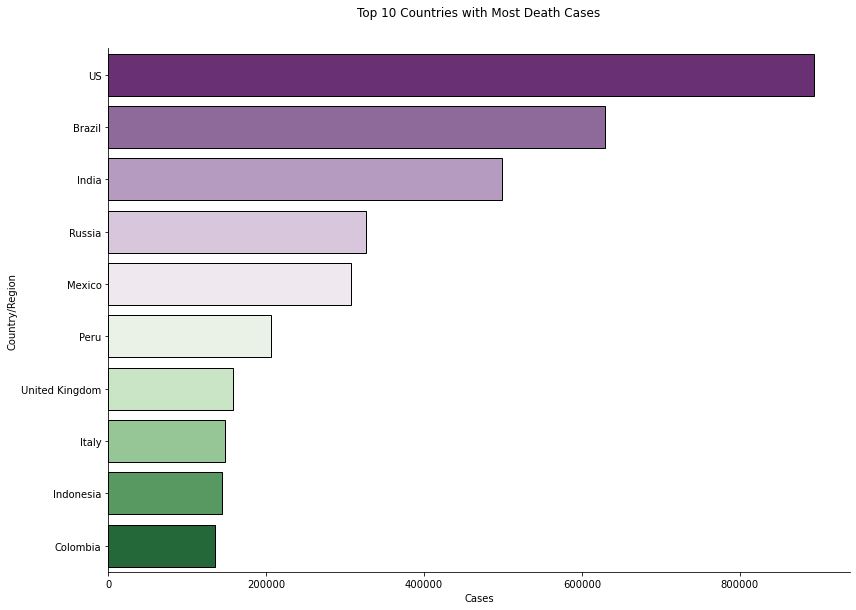

In [16]:
sns.catplot(x = "Value", y = "Country/Region", data = dea_top, kind = "bar", height = 8, aspect = 12/8, palette = "PRGn")
plt.title("Top 10 Countries with Most Death Cases", y = 1.05, x = 0.5)
plt.xlabel("Cases")
plt.ticklabel_format(axis = "x", style = "plain") 
plt.show()

In [17]:
#df.groupby('Status', as_index = False).apply(lambda x: x.sort_values('Value', ascending = False).head(10))

#df.sort_values('Value', ascending = False).groupby("Status", as_index = False).head(10).reset_index()


### List of Top 10 Countries/Regions with Most Confirmed & Death Cases

In [18]:
nam = df.sort_values('Value', ascending = False).groupby("Status", as_index = False).head(10)["Country/Region"].values

nam 


array(['US', 'India', 'Brazil', 'France', 'United Kingdom', 'Russia',
       'Turkey', 'Italy', 'Germany', 'Spain', 'US', 'Brazil', 'India',
       'Russia', 'Mexico', 'Peru', 'United Kingdom', 'Italy', 'Indonesia',
       'Colombia'], dtype=object)

In [19]:
df_top = df[df["Country/Region"].isin(nam)].sort_values('Value', ascending = False)

df_top

Status  Country/Region     Value
182  Confirmed              US  75680487
79   Confirmed           India  41803318
23   Confirmed          Brazil  25820745
62   Confirmed          France  19998301
186  Confirmed  United Kingdom  17632062
144  Confirmed          Russia  11936064
181  Confirmed          Turkey  11833165
85   Confirmed           Italy  11235745
66   Confirmed         Germany  10474992
164  Confirmed           Spain  10125348
37   Confirmed        Colombia   5916825
115  Confirmed          Mexico   4985689
80   Confirmed       Indonesia   4353370
138  Confirmed            Peru   3286151
378      Death              US    894316
219      Death          Brazil    629301
275      Death           India    498983
340      Death          Russia    325986
311      Death          Mexico    306920
334      Death            Peru    206220
382      Death  United Kingdom    157938
281      Death           Italy    147320
276      Death       Indonesia    144320
233      Death        Colombia    134781
258      Death          France    132583
262      Death         Germany    118339
360      Death           Spain     93857
377      Death          Turkey     87831

### Convert Long Table into Wide Table

In [20]:
pd.pivot(df_top, index = "Country/Region", columns = "Status", values = "Value").rename_axis(columns = None).reset_index()

Country/Region  Confirmed   Death
0           Brazil   25820745  629301
1         Colombia    5916825  134781
2           France   19998301  132583
3          Germany   10474992  118339
4            India   41803318  498983
5        Indonesia    4353370  144320
6            Italy   11235745  147320
7           Mexico    4985689  306920
8             Peru    3286151  206220
9           Russia   11936064  325986
10           Spain   10125348   93857
11          Turkey   11833165   87831
12              US   75680487  894316
13  United Kingdom   17632062  157938

### Convert a Pandas DataFrame into a Table

In [21]:
new = Table.from_df(pd.pivot(df_top, index = "Country/Region", columns = "Status", values = "Value").rename_axis(columns = None).reset_index())

new

Country/Region | Confirmed | Death
Brazil         | 25820745  | 629301
Colombia       | 5916825   | 134781
France         | 19998301  | 132583
Germany        | 10474992  | 118339
India          | 41803318  | 498983
Indonesia      | 4353370   | 144320
Italy          | 11235745  | 147320
Mexico         | 4985689   | 306920
Peru           | 3286151   | 206220
Russia         | 11936064  | 325986
... (4 rows omitted)

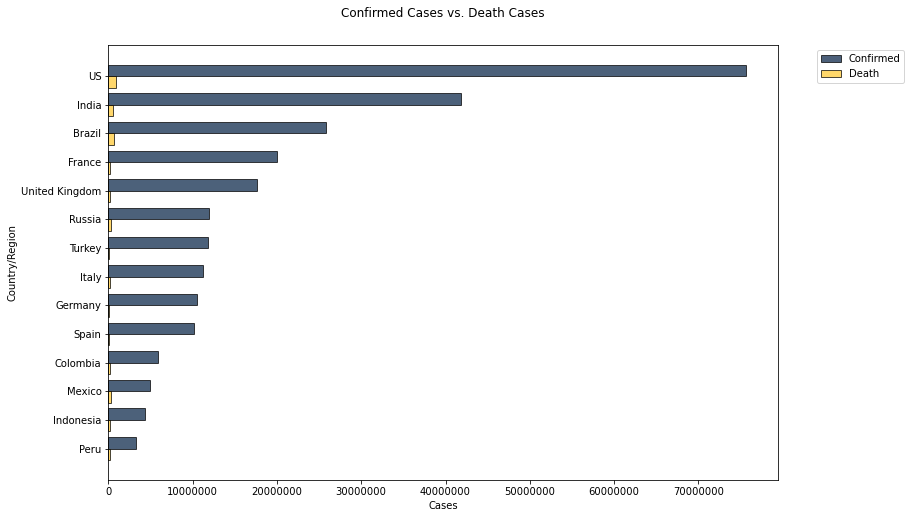

In [22]:
new.sort("Confirmed", descending = True).barh("Country/Region", height = 8, width = 12)
plt.title("Confirmed Cases vs. Death Cases", y = 1.05, x = 0.5)
plt.xlabel("Cases")
plt.ticklabel_format(axis = "x", style = "plain") # plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))    
plt.show()

### Visualization on Map

In [23]:
loc = total.drop_duplicates(subset = "Country/Region")[["Country/Region", "Lat", "Long"]]

loc

Country/Region        Lat        Long
0              Afghanistan  33.939110   67.709953
743                Albania  41.153300   20.168300
1486               Algeria  28.033900    1.659600
2229               Andorra  42.506300    1.521800
2972                Angola -11.202700   17.873900
...                    ...        ...         ...
204325             Vietnam  14.058324  108.277199
205068  West Bank and Gaza  31.952200   35.233200
205811               Yemen  15.552727   48.516388
206554              Zambia -13.133897   27.849332
207297            Zimbabwe -19.015438   29.154857

[196 rows x 3 columns]

In [24]:
newloc = pd.merge(df, loc, how = 'inner', on = ['Country/Region'])

newloc

Status Country/Region   Value        Lat       Long
0    Confirmed    Afghanistan  164190  33.939110  67.709953
1        Death    Afghanistan    7418  33.939110  67.709953
2    Confirmed        Albania  261240  41.153300  20.168300
3        Death        Albania    3362  41.153300  20.168300
4    Confirmed        Algeria  254885  28.033900   1.659600
..         ...            ...     ...        ...        ...
387      Death          Yemen    2018  15.552727  48.516388
388  Confirmed         Zambia  305959 -13.133897  27.849332
389      Death         Zambia    3921 -13.133897  27.849332
390  Confirmed       Zimbabwe  230012 -19.015438  29.154857
391      Death       Zimbabwe    5352 -19.015438  29.154857

[392 rows x 5 columns]

In [25]:
import geopandas
cov19data = geopandas.GeoDataFrame(newloc, geometry = geopandas.points_from_xy(newloc.Long, newloc.Lat))
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world_cov19 = geopandas.sjoin(world, cov19data, how = "inner", op = 'intersects')

world_cov19


pop_est      continent                 name iso_a3  gdp_md_est  \
0      920938        Oceania                 Fiji    FJI      8374.0   
0      920938        Oceania                 Fiji    FJI      8374.0   
1    53950935         Africa             Tanzania    TZA    150600.0   
1    53950935         Africa             Tanzania    TZA    150600.0   
3    35623680  North America               Canada    CAN   1674000.0   
..        ...            ...                  ...    ...         ...   
174   1895250         Europe               Kosovo    -99     18490.0   
175   1218208  North America  Trinidad and Tobago    TTO     43570.0   
175   1218208  North America  Trinidad and Tobago    TTO     43570.0   
176  13026129         Africa             S. Sudan    SSD     20880.0   
176  13026129         Africa             S. Sudan    SSD     20880.0   

                                              geometry  index_right  \
0    MULTIPOLYGON (((180.00000 -16.06713, 180.00000...          121   
0    MULTIPOLYGON (((180.00000 -16.06713, 180.00000...          120   
1    POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...          348   
1    POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...          349   
3    MULTIPOLYGON (((-122.84000 49.00000, -122.9742...           64   
..                                                 ...          ...   
174  POLYGON ((20.59025 41.85541, 20.52295 42.21787...          186   
175  POLYGON ((-61.68000 10.76000, -61.10500 10.890...          359   
175  POLYGON ((-61.68000 10.76000, -61.10500 10.890...          358   
176  POLYGON ((30.83385 3.50917, 29.95350 4.17370, ...          326   
176  POLYGON ((30.83385 3.50917, 29.95350 4.17370, ...          327   

        Status       Country/Region    Value        Lat        Long  
0        Death                 Fiji      809 -17.713400  178.065000  
0    Confirmed                 Fiji    63147 -17.713400  178.065000  
1    Confirmed             Tanzania    33230  -6.369028   34.888822  
1        Death             Tanzania      789  -6.369028   34.888822  
3    Confirmed               Canada  3081616  53.933300 -116.576500  
..         ...                  ...      ...        ...         ...  
174  Confirmed               Kosovo   210561  42.602636   20.902977  
175      Death  Trinidad and Tobago     3423  10.691800  -61.222500  
175  Confirmed  Trinidad and Tobago   112679  10.691800  -61.222500  
176  Confirmed          South Sudan    16810   6.877000   31.307000  
176      Death          South Sudan      137   6.877000   31.307000  

[342 rows x 12 columns]

### Covid-19 Confirmed Cases

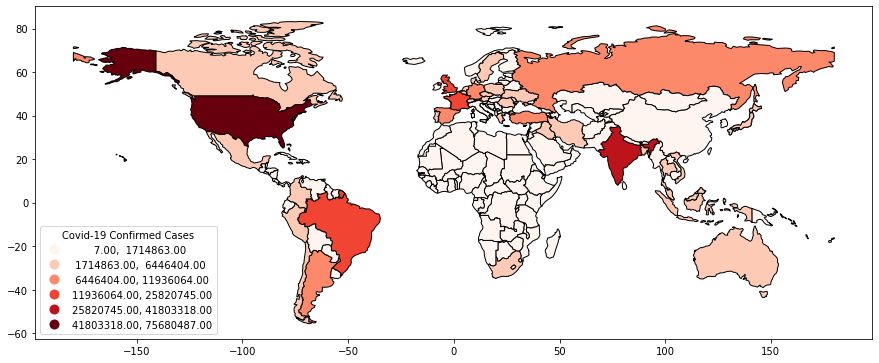

In [26]:
fig, ax = plt.subplots(1, 1, figsize = (15,10))
world_cov19.query("Status == 'Confirmed'").plot(column = 'Value', ax = ax, cmap = 'Reds', scheme = 'NaturalBreaks', k = 6, legend = True,
                legend_kwds = {'loc':'lower left','title':'Covid-19 Confirmed Cases'})
plt.show()


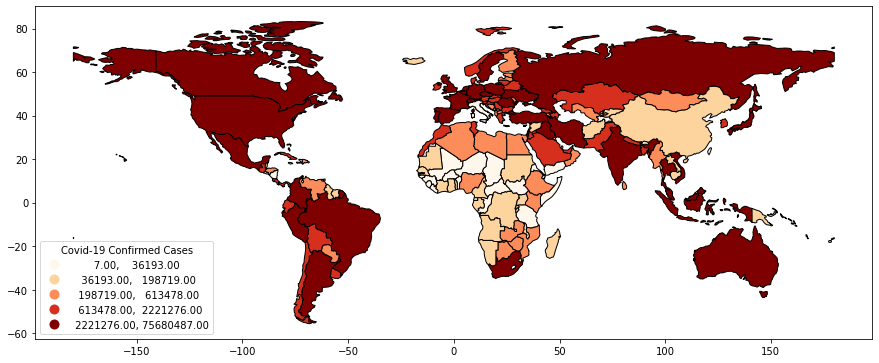

In [27]:
fig, ax = plt.subplots(1, 1, figsize = (15,10))

world_cov19.query("Status == 'Confirmed'").plot(column = 'Value', cmap = 'OrRd', scheme = 'quantiles', ax = ax, legend = True,
                                               legend_kwds = {'loc':'lower left','title':'Covid-19 Confirmed Cases'})

plt.show()

### Covid-19 Death Cases

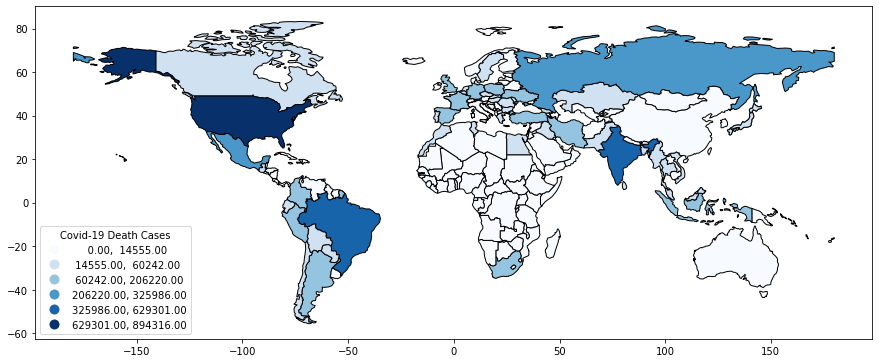

In [28]:
fig, ax = plt.subplots(1, 1, figsize = (15,10))
world_cov19.query("Status == 'Death'").plot(column = 'Value', ax = ax, cmap = 'Blues', scheme = 'NaturalBreaks', k = 6, legend = True,
                legend_kwds = {'loc':'lower left','title':'Covid-19 Death Cases'})
plt.show()


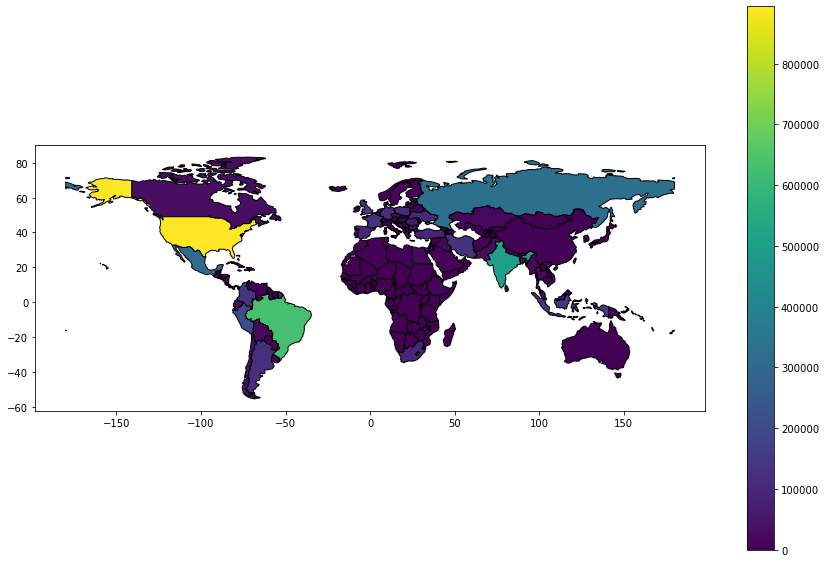

In [29]:
fig, ax = plt.subplots(1, 1, figsize = (15,10))
world_cov19.query("Status == 'Death'").plot(column = 'Value', ax = ax, legend = True)
plt.show()

### Confirmed & Death Cases Every Day

In [30]:
dtotal = total[["Date", "Country/Region", "Status", "Value"]].groupby(["Date","Status"], as_index = False).sum()

dtotal

Date     Status      Value
0     2020-01-22  Confirmed        557
1     2020-01-22      Death         17
2     2020-01-23  Confirmed        655
3     2020-01-23      Death         18
4     2020-01-24  Confirmed        941
...          ...        ...        ...
1481  2022-01-31      Death    5674374
1482  2022-02-01  Confirmed  381683860
1483  2022-02-01      Death    5688629
1484  2022-02-02  Confirmed  384859233
1485  2022-02-02      Death    5700923

[1486 rows x 3 columns]

In [31]:
import plotly.express as px

# color pallette
cnf, dth = '#2131bf', '#ff2e63'

fig = px.area(dtotal, x = "Date", y = "Value", color = 'Status', height = 600,
             title = 'Cases Over Time', color_discrete_sequence = [cnf,dth])
fig.show()